In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('financial_loan.csv')
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [4]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [5]:
continous = ['annual_income', 'dti', 'installment', 'int_rate','loan_amount','total_payment']

discrete_count = ['id', 'member_id', 'total_acc']

discrete_catagorical = ['address_state', 'application_type', 'emp_length', 'emp_title','grade', 'home_ownership', 
                       'loan_status','purpose', 'sub_grade', 'term', 'verification_status']

time_series = ['issue_date', 'last_credit_pull_date','last_payment_date', 'next_payment_date']

In [6]:
df['address_state'].unique()

array(['GA', 'CA', 'TX', 'IL', 'PA', 'FL', 'MI', 'RI', 'NY', 'MD', 'WI',
       'NV', 'UT', 'WA', 'NH', 'HI', 'MA', 'OK', 'NJ', 'OH', 'AZ', 'CT',
       'MN', 'CO', 'TN', 'VA', 'MO', 'DE', 'NM', 'LA', 'AR', 'KY', 'NC',
       'SC', 'WV', 'KS', 'WY', 'OR', 'AL', 'VT', 'MS', 'DC', 'MT', 'SD',
       'AK', 'IN', 'ME', 'ID', 'NE', 'IA'], dtype=object)

In [7]:
df['address_state'].value_counts()

address_state
CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
IL    1486
PA    1482
VA    1375
GA    1355
MA    1310
OH    1188
MD    1027
AZ     833
WA     805
CO     770
NC     759
CT     730
MI     685
MO     660
MN     592
NV     482
SC     464
WI     446
OR     436
AL     432
LA     426
KY     320
OK     293
KS     260
UT     252
AR     236
DC     214
RI     196
NM     183
HI     170
WV     167
NH     161
DE     110
WY      79
MT      79
AK      78
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: count, dtype: int64

In [8]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [9]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    38576
Name: count, dtype: int64

In [10]:
df['emp_length'].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [11]:
df['emp_length'].value_counts()

emp_length
10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
5 years      3273
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: count, dtype: int64

In [12]:
df['emp_title'].unique()

array(['Ryder', 'MKC Accounting', 'Chemat Technology Inc', ...,
       'Anaheim Regional Medical Center', 'Brooklyn Radiology',
       'Allen Edmonds'], dtype=object)

In [13]:
df['emp_title'].value_counts()

emp_title
US Army                           135
Bank of America                   109
IBM                                67
AT&T                               63
Wells Fargo                        57
                                 ... 
Emeril's Delmonico's                1
The Shafer Law Group                1
U.S navy                            1
Wellspring Healthcare Services      1
Allen Edmonds                       1
Name: count, Length: 28525, dtype: int64

In [14]:
df['grade'].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [15]:
df['grade'].value_counts()

grade
B    11674
A     9689
C     7904
D     5182
E     2786
F     1028
G      313
Name: count, dtype: int64

In [16]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [17]:
df['home_ownership'].value_counts()

home_ownership
RENT        18439
MORTGAGE    17198
OWN          2838
OTHER          98
NONE            3
Name: count, dtype: int64

In [18]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [19]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5333
Current         1098
Name: count, dtype: int64

In [20]:
df['purpose'].unique()

array(['car', 'credit card', 'Debt consolidation', 'educational',
       'home improvement', 'house', 'major purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small business', 'vacation',
       'wedding'], dtype=object)

In [21]:
df['purpose'].value_counts()

purpose
Debt consolidation    18214
credit card            4998
other                  3824
home improvement       2876
major purchase         2110
small business         1776
car                    1497
wedding                 928
medical                 667
moving                  559
house                   366
vacation                352
educational             315
renewable_energy         94
Name: count, dtype: int64

In [22]:
df['sub_grade'].unique()

array(['C4', 'E1', 'C5', 'B2', 'A1', 'C3', 'C2', 'A4', 'A5', 'B5', 'B4',
       'B3', 'B1', 'D1', 'A2', 'A3', 'D4', 'D2', 'C1', 'D3', 'E3', 'F1',
       'E2', 'E5', 'D5', 'E4', 'F2', 'G3', 'F3', 'G1', 'F4', 'G4', 'G2',
       'F5', 'G5'], dtype=object)

In [23]:
df['sub_grade'].value_counts()

sub_grade
B3    2834
A4    2803
A5    2654
B5    2644
B4    2455
C1    2089
B2    1990
C2    1972
B1    1751
A3    1740
C3    1490
A2    1440
D2    1314
C4    1202
C5    1151
D3    1144
A1    1052
D4     960
D1     913
D5     851
E1     750
E2     640
E3     538
E4     448
E5     410
F1     325
F2     243
F3     182
F4     163
F5     115
G1     101
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

In [24]:
df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [25]:
df['term'].value_counts()

term
 36 months    28237
 60 months    10339
Name: count, dtype: int64

In [26]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [27]:
df['verification_status'].value_counts()

verification_status
Not Verified       16464
Verified           12335
Source Verified     9777
Name: count, dtype: int64

In [28]:
df[continous].describe()

,annual_income,dti,installment,int_rate,loan_amount,total_payment
count,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,12263.348533
std,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,9051.104777
min,4.000000e+03,0.000000,15.690000,0.054200,500.000000,34.000000
25%,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,5633.000000
50%,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,10042.000000
75%,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,16658.000000
max,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,58564.000000


In [29]:
df['issue_date'].value_counts()

issue_date
11-12-2021    2188
11-11-2021    2120
11-10-2021    2025
11-09-2021    1980
11-08-2021    1873
              ... 
02-09-2021       1
22-07-2021       1
12-12-2021       1
02-02-2021       1
07-06-2021       1
Name: count, Length: 65, dtype: int64

# data cleaning

In [30]:
df.duplicated().sum()              # there is no duplicates.

0

In [31]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [32]:
# as we know emp_title is a discrete variable
a=df['emp_title'].mode()
df['emp_title'].fillna(a[0],inplace=True)

In [33]:
df.isnull().sum()

id                       0
address_state            0
application_type         0
emp_length               0
emp_title                0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

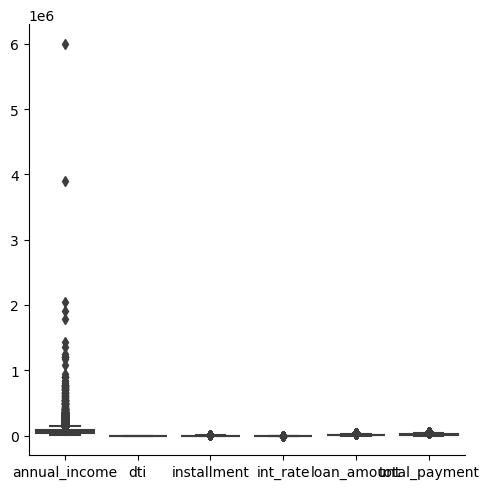

In [34]:
sns.catplot(df[continous],kind='box')
plt.show()

In [35]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y', errors='coerce')
  # this format argument use to show python in which format you written your date_string .

In [36]:
df['last_credit_pull_date'] = pd.to_datetime(df.last_credit_pull_date, format='%d-%m-%Y', errors='coerce')
  # this is also another option instead of df['last_credit_pull_date'] , we can use like df.last_credit_pull_date .

In [37]:
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], format='%d-%m-%Y', errors='coerce')

In [38]:
df['next_payment_date'] = df['next_payment_date'].astype('datetime64[ns]')
  # this is the another option from string_date to date_time .

In [39]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [40]:
 df.sort_values(by='issue_date',inplace=True)

In [41]:
df[time_series]

,issue_date,last_credit_pull_date,last_payment_date,next_payment_date
1,2021-01-01,2021-12-14,2021-01-15,2021-02-15
4,2021-01-01,2021-12-14,2021-01-15,2021-02-15
2,2021-01-05,2021-12-12,2021-01-09,2021-02-09
7695,2021-01-08,2021-07-11,2021-08-11,2021-09-11
7026,2021-01-08,2021-04-16,2021-10-10,2021-11-10
...,...,...,...,...
1646,2021-12-11,2021-04-16,2021-06-15,2021-07-15
1645,2021-12-11,2021-05-16,2021-12-14,2022-01-14
1651,2021-12-11,2021-04-16,2021-12-14,2022-01-14
33840,2021-12-11,2021-05-16,2021-10-12,2021-11-12


In [42]:
import datetime as dt
df['issue_month'] = df['issue_date'].dt.strftime("%B")
df['issue_month']

1         January
4         January
2         January
7695      January
7026      January
           ...   
1646     December
1645     December
1651     December
33840    December
18       December
Name: issue_month, Length: 38576, dtype: object

# data analysis

In [43]:
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_month
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,January
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,January
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,January
7695,235094,MD,INDIVIDUAL,10+ years,Maryland Motor Vehicle,B,MORTGAGE,2021-01-08,2021-07-11,2021-08-11,...,36 months,Not Verified,55000.0,0.1228,478.40,0.0920,15000,45,17317,January
7026,209349,MA,INDIVIDUAL,10+ years,state street bank,A,MORTGAGE,2021-01-08,2021-04-16,2021-10-10,...,36 months,Not Verified,61200.0,0.1700,225.86,0.0807,7200,8,7309,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,1061914,NY,INDIVIDUAL,6 years,JPMORGAN CHASE,G,RENT,2021-12-11,2021-04-16,2021-06-15,...,60 months,Not Verified,85000.0,0.0702,628.13,0.2274,22400,16,26377,December
1645,1061975,CA,INDIVIDUAL,10+ years,Mercy San Juan Medical Center,D,MORTGAGE,2021-12-11,2021-05-16,2021-12-14,...,36 months,Not Verified,93000.0,0.1346,426.47,0.1677,12000,21,15352,December
1651,1061355,NJ,INDIVIDUAL,4 years,staff die cutting LLC,B,RENT,2021-12-11,2021-04-16,2021-12-14,...,36 months,Verified,45000.0,0.2261,335.45,0.1269,10000,18,12076,December
33840,1050726,CA,INDIVIDUAL,3 years,Swami International,B,RENT,2021-12-11,2021-05-16,2021-10-12,...,36 months,Source Verified,45000.0,0.0749,161.13,0.0991,5000,17,5367,December


In [44]:
df=df.drop(columns=['id','emp_title','total_acc','application_type','last_credit_pull_date','last_payment_date','member_id','next_payment_date'])
df

,address_state,emp_length,grade,home_ownership,issue_date,loan_status,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_payment,issue_month
1,CA,9 years,E,RENT,2021-01-01,Fully Paid,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,3939,January
4,IL,10+ years,A,MORTGAGE,2021-01-01,Fully Paid,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,3835,January
2,CA,4 years,C,RENT,2021-01-05,Charged Off,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,3522,January
7695,MD,10+ years,B,MORTGAGE,2021-01-08,Fully Paid,Debt consolidation,B1,36 months,Not Verified,55000.0,0.1228,478.40,0.0920,15000,17317,January
7026,MA,10+ years,A,MORTGAGE,2021-01-08,Charged Off,Debt consolidation,A4,36 months,Not Verified,61200.0,0.1700,225.86,0.0807,7200,7309,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,NY,6 years,G,RENT,2021-12-11,Charged Off,credit card,G1,60 months,Not Verified,85000.0,0.0702,628.13,0.2274,22400,26377,December
1645,CA,10+ years,D,MORTGAGE,2021-12-11,Fully Paid,credit card,D2,36 months,Not Verified,93000.0,0.1346,426.47,0.1677,12000,15352,December
1651,NJ,4 years,B,RENT,2021-12-11,Fully Paid,credit card,B5,36 months,Verified,45000.0,0.2261,335.45,0.1269,10000,12076,December
33840,CA,3 years,B,RENT,2021-12-11,Fully Paid,other,B1,36 months,Source Verified,45000.0,0.0749,161.13,0.0991,5000,5367,December


In [45]:
df['loan_amount'].sum()

435757075

In [46]:
df['total_payment'].sum()

473070933

In [47]:
df.groupby('emp_length')['loan_amount'].sum()

emp_length
1 year        32883125
10+ years    116115950
2 years       44967975
3 years       43937850
4 years       37600375
5 years       36973625
6 years       25612650
7 years       20811725
8 years       17558950
9 years       15084225
< 1 year      44210625
Name: loan_amount, dtype: int64

In [48]:
df.groupby('emp_length')['total_payment'].sum()

emp_length
1 year        35498348
10+ years    125871616
2 years       49206961
3 years       47551832
4 years       40964850
5 years       40397571
6 years       27908658
7 years       22584136
8 years       19025777
9 years       16516173
< 1 year      47545011
Name: total_payment, dtype: int64

In [49]:
pd.crosstab(df['emp_length'],df['home_ownership'])

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
emp_length,,,,,
1 year,970,0,15,218,2026
10+ years,5549,0,19,756,2546
2 years,1468,0,10,282,2622
3 years,1570,0,10,253,2255
4 years,1401,0,7,241,1779
5 years,1482,1,5,233,1552
6 years,1092,0,4,161,971
7 years,884,0,3,140,745
8 years,780,0,4,119,573


In [50]:
df.groupby('emp_length')['dti'].mean()

emp_length
1 year       0.130707
10+ years    0.137189
2 years      0.131047
3 years      0.131643
4 years      0.131997
5 years      0.134271
6 years      0.138239
7 years      0.136785
8 years      0.137697
9 years      0.135387
< 1 year     0.125547
Name: dti, dtype: float64

In [51]:
df.groupby('emp_length')['dti'].min()

emp_length
1 year       0.0
10+ years    0.0
2 years      0.0
3 years      0.0
4 years      0.0
5 years      0.0
6 years      0.0
7 years      0.0
8 years      0.0
9 years      0.0
< 1 year     0.0
Name: dti, dtype: float64

In [52]:
df.groupby('emp_length')['dti'].max()

emp_length
1 year       0.2993
10+ years    0.2999
2 years      0.2995
3 years      0.2993
4 years      0.2982
5 years      0.2988
6 years      0.2992
7 years      0.2989
8 years      0.2944
9 years      0.2965
< 1 year     0.2993
Name: dti, dtype: float64

In [53]:
pd.crosstab(df['emp_length'],df['sub_grade'])

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,79,106,132,232,199,145,165,239,207,261,...,23,19,14,11,10,7,3,2,3,1
10+ years,349,374,413,599,561,389,467,662,561,590,...,87,59,45,48,39,25,20,17,14,8
2 years,95,136,176,304,308,226,234,326,295,334,...,36,29,17,16,12,7,5,2,8,3
3 years,73,166,170,285,312,180,212,319,270,278,...,29,24,24,15,12,13,13,5,5,2
4 years,75,123,162,255,225,141,177,236,229,220,...,29,17,23,20,7,14,7,1,5,4
5 years,83,115,154,251,225,154,170,258,208,242,...,35,23,14,14,7,4,5,6,4,2
6 years,70,80,96,171,152,102,122,148,148,137,...,18,15,14,5,4,8,3,3,2,1
7 years,56,67,70,124,117,71,87,141,105,127,...,20,8,8,13,4,6,6,2,4,1
8 years,39,73,71,112,110,78,67,102,88,92,...,9,15,7,4,6,2,5,2,1,1


In [54]:
pd.crosstab(df['emp_length'],df['grade'])

grade,A,B,C,D,E,F,G
emp_length,,,,,,,
1 year,748,1017,720,449,202,77,16
10+ years,2296,2669,1689,1162,692,278,84
2 years,1019,1415,889,599,325,110,25
3 years,1006,1259,865,547,269,104,38
4 years,840,1003,710,497,251,96,31
5 years,828,1032,620,445,234,93,21
6 years,569,657,459,296,174,56,17
7 years,434,531,378,232,125,53,19
8 years,405,427,290,201,101,41,11


In [55]:
pd.crosstab(df['emp_length'],df['loan_status'])

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,445,71,2713
10+ years,1322,391,7157
2 years,561,97,3724
3 years,548,83,3457
4 years,454,94,2880
5 years,449,88,2736
6 years,306,61,1861
7 years,262,62,1448
8 years,200,44,1232


In [56]:
pd.crosstab(df['emp_length'],df['purpose'])

purpose,Debt consolidation,car,credit card,educational,home improvement,house,major purchase,medical,moving,other,renewable_energy,small business,vacation,wedding
emp_length,,,,,,,,,,,,,,
1 year,1446,141,463,44,146,34,188,60,62,361,7,175,15,87
10+ years,4257,320,1130,38,913,82,439,174,71,855,28,357,98,108
2 years,2063,164,558,45,288,50,243,78,67,453,7,206,32,128
3 years,1907,149,523,26,278,43,247,68,60,390,11,208,38,140
4 years,1610,127,455,33,238,32,194,58,54,324,7,164,41,91
5 years,1569,130,397,23,248,30,193,48,40,309,4,138,37,107
6 years,1109,96,281,10,168,17,124,33,27,188,8,94,19,54
7 years,863,79,236,9,126,21,83,28,10,169,11,86,14,37
8 years,734,61,170,8,138,13,75,29,14,136,2,62,10,24


In [57]:
pd.crosstab(df['emp_length'],df['verification_status'])

verification_status,Not Verified,Source Verified,Verified
emp_length,,,
1 year,1546,832,851
10+ years,3318,1981,3571
2 years,2047,1098,1237
3 years,1825,1052,1211
4 years,1478,851,1099
5 years,1415,827,1031
6 years,935,566,727
7 years,733,455,584
8 years,629,343,504


In [58]:
pd.crosstab(df['emp_length'],df['term'])

term,36 months,60 months
emp_length,,
1 year,2574,655
10+ years,5832,3038
2 years,3409,973
3 years,3086,1002
4 years,2555,873
5 years,2347,926
6 years,1564,664
7 years,1250,522
8 years,1046,430


In [59]:
df.to_excel('bank_loan.xlsx',index=False)